In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('emails.csv')

# Split the data into features (X) and labels (y)
X = data['text']
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create an SVM classifier
svm = SVC(kernel='linear')

# Train the SVM model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [4]:
# Print the model parameters for linear SVM
if svm.kernel == 'linear':
    print("Coefficients (w):")
    print(svm.coef_)
    print()
    print("Intercept (b):")
    print(svm.intercept_)
else:
    print("Model parameters are not available for non-linear SVM.")


Coefficients (w):
  (0, 17773)	0.022241001363664043
  (0, 15569)	0.06672300409099213
  (0, 15271)	0.022241001363664043
  (0, 32527)	0.00012729110526458527
  (0, 32525)	0.0001909366578968779
  (0, 31998)	0.00025458221052917054
  (0, 31691)	0.00012729110526458527
  (0, 31625)	6.364555263229263e-05
  (0, 31397)	6.364555263229263e-05
  (0, 31249)	6.364555263229263e-05
  (0, 31248)	6.364555263229263e-05
  (0, 31230)	6.364555263229263e-05
  (0, 30808)	6.364555263229263e-05
  (0, 30807)	6.364555263229263e-05
  (0, 29562)	6.364555263229263e-05
  (0, 29399)	6.364555263229263e-05
  (0, 28871)	6.364555263229263e-05
  (0, 28686)	6.364555263229263e-05
  (0, 28430)	0.00012729110526458527
  (0, 28402)	6.364555263229263e-05
  (0, 28400)	6.364555263229263e-05
  (0, 28164)	6.364555263229263e-05
  (0, 28080)	6.364555263229263e-05
  (0, 28048)	6.364555263229263e-05
  (0, 27999)	6.364555263229263e-05
  :	:
  (0, 15203)	0.03972143036469564
  (0, 14659)	-0.01060050543341468
  (0, 14233)	0.15211455850533712
 

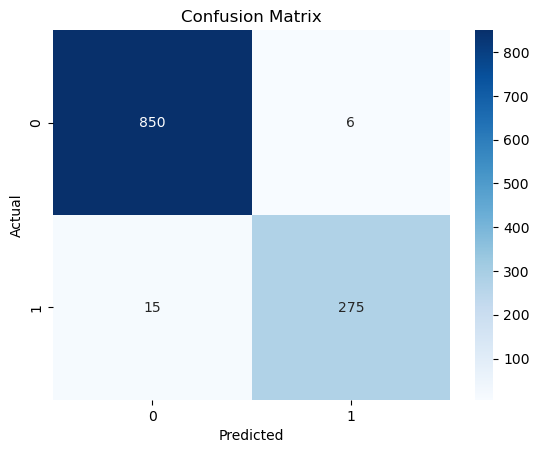

In [5]:
# Predict the labels for the test set
y_pred = svm.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
# print the accuracy score
print("Accuracy:", svm.score(X_test, y_test))

Accuracy: 0.981675392670157


In [7]:
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('emails.csv')

# Split the data into features (X) and labels (y)
X = data['text']
y = data['spam']

# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Apply dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create an SVM classifier
svm = SVC()

# Train the SVM model
svm.fit(X_pca, y)

# Predict the labels for the entire dataset
y_pred = svm.predict(X_pca)

# Create a DataFrame combining the original features, predicted labels, and PCA components
df = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'spam': y, 'predicted_spam': y_pred})
plt.show()

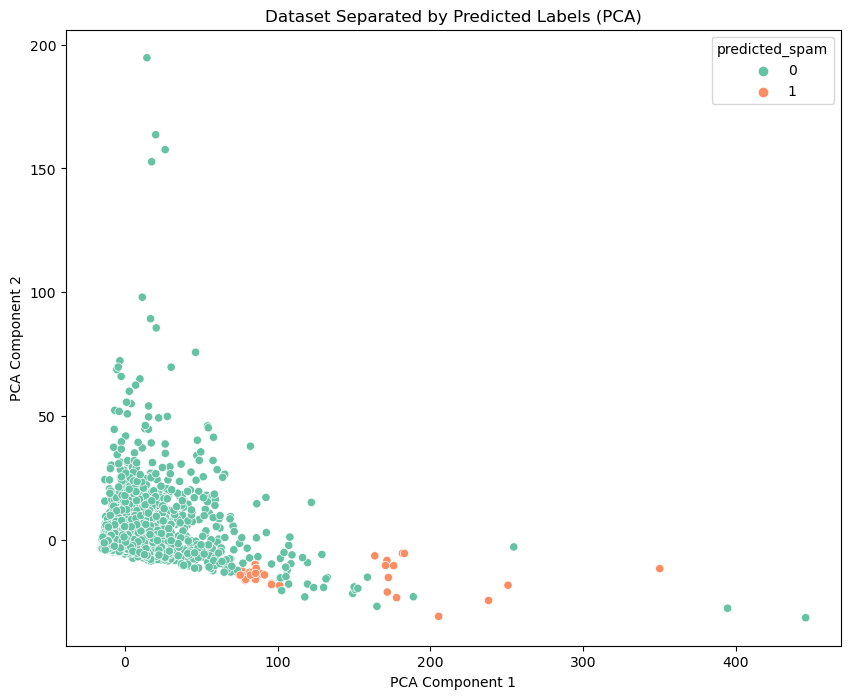

In [8]:
# Plot the dataset separated by the predicted labels
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='predicted_spam', palette='Set2')
plt.title('Dataset Separated by Predicted Labels (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()